<a href="https://colab.research.google.com/github/AtharKharal/Tensorflow_Python_GPUsTPUs/blob/master/Playing_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn import datasets
iris= datasets.load_iris()

In [0]:
print(iris.data[1:5])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
data = {'Year': [2000, 2005, 2010, 2014],
       'Median_Age': [24.2, 26.4, 28.5, 30.3],
       'Density': [244, 256, 268, 279]}
df1=pd.DataFrame(data)

In [0]:
df1.Year

0    2000
1    2005
2    2010
3    2014
Name: Year, dtype: int64

In [0]:
df1.head()

,Density,Median_Age,Year
0,244,24.2,2000
1,256,26.4,2005
2,268,28.5,2010
3,279,30.3,2014


In [0]:
df1.columns

Index(['Density', 'Median_Age', 'Year'], dtype='object')

In [0]:
%who

data	 datasets	 df1	 iris	 pd	 


In [0]:
print(dir())

['In', 'Out', '_', '_4', '_5', '_6', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_ih', '_ii', '_iii', '_oh', '_sh', 'data', 'datasets', 'df1', 'exit', 'get_ipython', 'iris', 'pd', 'quit']


In [0]:
whos

Variable   Type         Data/Info
---------------------------------
data       dict         n=3
datasets   module       <module 'sklearn.datasets<...>rn/datasets/__init__.py'>
df1        DataFrame       Density  Median_Age  Y<...>    279        30.3  2014
iris       Bunch        {'data': array([[5.1, 3.5<...>/datasets/data/iris.csv'}
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [0]:
whos

Variable   Type         Data/Info
---------------------------------
data       dict         n=3
datasets   module       <module 'sklearn.datasets<...>rn/datasets/__init__.py'>
df1        DataFrame       Density  Median_Age  Y<...>    279        30.3  2014
iris       Bunch        {'data': array([[5.1, 3.5<...>/datasets/data/iris.csv'}
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [0]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [0]:
len??

In [0]:
who_ls

['data', 'datasets', 'df1', 'iris', 'pd']

In [0]:
pd.__version__

'0.22.0'

In [0]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [0]:
index= pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [0]:
pop= pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
pop.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [0]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [0]:
pd.MultiIndex.from_product([['a','b'],[4,5]])

MultiIndex(levels=[['a', 'b'], [4, 5]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [0]:
import numpy as np
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      38.0  38.1  49.0  35.7  29.0  37.5
     2      24.0  36.5  51.0  37.1  51.0  37.4
2014 1      36.0  37.4  45.0  34.6  36.0  37.0
     2      50.0  38.6  55.0  35.4  30.0  38.5

In [0]:
health_data['Sue']

type          HR  Temp
year visit            
2013 1      29.0  37.5
     2      51.0  37.4
2014 1      36.0  37.0
     2      30.0  38.5

In [0]:
health_data.unstack()

subject   Bob                   Guido                     Sue              \
type       HR        Temp          HR        Temp          HR        Temp   
visit       1     2     1     2     1     2     1     2     1     2     1   
year                                                                        
2013     38.0  24.0  38.1  36.5  49.0  51.0  35.7  37.1  29.0  51.0  37.5   
2014     36.0  50.0  37.4  38.6  45.0  55.0  34.6  35.4  36.0  30.0  37.0   

subject        
type           
visit       2  
year           
2013     37.4  
2014     38.5

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


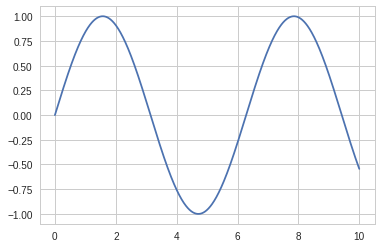

In [0]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));